In [277]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

Se inicia con la lectura del DataSet

In [278]:
df = pd.read_csv('/content/CreditCardData.csv')

In [279]:
df.head(5)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


Se analiza la existencia de datos tipo Nan y Null en el data set

In [280]:
df.isna().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [281]:
df.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

Se procede a eliminar Nans y Nulls dado su poca abundancia (a lo más 25 filas) en un data set de 100 mil entradas.

In [282]:
df=df.dropna()
df.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

Por lo tanto, los datos null eran los mismos que los nan.

In [283]:
df.shape

(99977, 16)

In [284]:
df['Transaction ID'].nunique()

95657

In [285]:
duplicates=df['Transaction ID'].duplicated().loc[lambda x : x == True]
duplicates

1516     True
1978     True
3034     True
3293     True
3317     True
         ... 
99927    True
99955    True
99972    True
99989    True
99999    True
Name: Transaction ID, Length: 4320, dtype: bool

In [286]:
df.loc[1516]

Transaction ID               #3003 533
Date                         14-Oct-20
Day of Week                  Wednesday
Time                                20
Type of Card                      Visa
Entry Mode                         CVC
Amount                             £17
Type of Transaction             Online
Merchant Group            Subscription
Country of Transaction           India
Shipping Address                 India
Country of Residence             India
Gender                               M
Age                               39.6
Bank                          Barclays
Fraud                                0
Name: 1516, dtype: object

Como podemos ver, existe repetición en el Transaction ID, por lo que debemos verificar que se tratan de distintas transacciones en realidad.

In [287]:
df.index[df['Transaction ID'] == '#3003 533']

Int64Index([662, 1516], dtype='int64')

In [288]:
df.loc[662]

Transaction ID                 #3003 533
Date                           13-Oct-20
Day of Week                      Tuesday
Time                                  19
Type of Card                  MasterCard
Entry Mode                           PIN
Amount                               £15
Type of Transaction                  ATM
Merchant Group                    Gaming
Country of Transaction    United Kingdom
Shipping Address          United Kingdom
Country of Residence      United Kingdom
Gender                                 M
Age                                 30.8
Bank                            Barclays
Fraud                                  0
Name: 662, dtype: object

Basado en el ejemplo de arriba, dos transacciones con el mismo ID son de hecho diferentes.
Entonces, intepretaremos la repetición de ID's como un error.

Ya que la columna transaction ID debería actuar como index, pero ha mostrado repetición, procediremos a eliminarla.

In [289]:
df=df.drop(['Transaction ID'], axis=1)

In [290]:
df

,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


Procedemos a localizar valores únicos para analizar la variabilidad de los datos

In [291]:
for col in df:
  if col not in ['Amount']:
    print(df[col].unique())

['14-Oct-20' '13-Oct-20' '16-Oct-20' '15-Oct-20']
['Wednesday' 'Tuesday' 'Thursday' 'Friday']
[19 17 14 23 20 18 11  1 21  0  8  9 15 22  7  3 12  4  5 10 13  2 16  6
 24]
['Visa' 'MasterCard']
['Tap' 'PIN' 'CVC']
['POS' 'Online' 'ATM']
['Entertainment' 'Services' 'Restaurant' 'Electronics' 'Children'
 'Fashion' 'Food' 'Products' 'Subscription' 'Gaming']
['United Kingdom' 'USA' 'India' 'Russia' 'China']
['United Kingdom' 'USA' 'India' 'Russia' 'China']
['United Kingdom' 'USA' 'India' 'Russia' 'China']
['M' 'F']
[25.2 49.6 42.2 51.  38.  48.4 39.5 37.8 43.3 69.9 54.8 48.7 43.6 46.4
 50.6 37.2 54.3 62.  28.5 55.  29.9 80.5 63.3 45.5 58.4 47.2 42.4 46.1
 45.1 53.3 35.4 52.  35.  50.2 50.9 58.2 62.8 45.  40.4 47.3 23.3 46.3
 26.  72.9 48.3 36.6 50.3 29.7 57.  38.8 51.2 48.5 48.1 45.9 45.6 53.8
 53.  40.6 51.9 40.  41.8 55.1 58.7 30.3 62.3 57.3 50.  31.5 45.7 40.2
 46.2 46.9 42.6 56.8 35.9 61.8 33.6 49.1 47.5 60.  57.8 49.4 55.7 45.8
 33.2 43.1 44.7 52.5 57.7 45.2 61.6 36.3 49.3 52.8 41.3 3

Todas las variables, excepto por Amount y Age, contienen un número aceptable de valores posibles.

Note que existen 4 días diferentes en total en el data set, y (tras una corta investigación) el 'Barlcays' es un error ortográfico de 'Barclays'

Dado el volumen de datos, podemos analizar la posibilidad de eliminar datos basado en variables categóricas.

In [292]:
df['Bank']=df['Bank'].replace('Barlcays', 'Barclays')

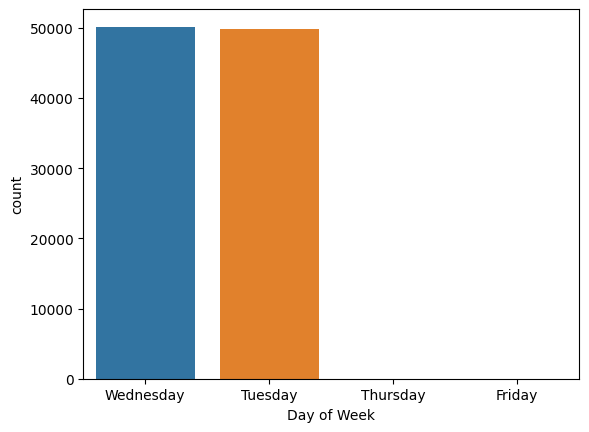

In [293]:
ax=sns.countplot(x=df['Day of Week'])

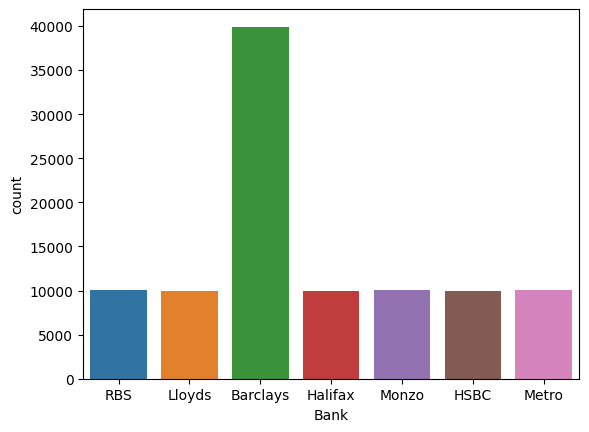

In [294]:
ax=sns.countplot(x=df['Bank'])

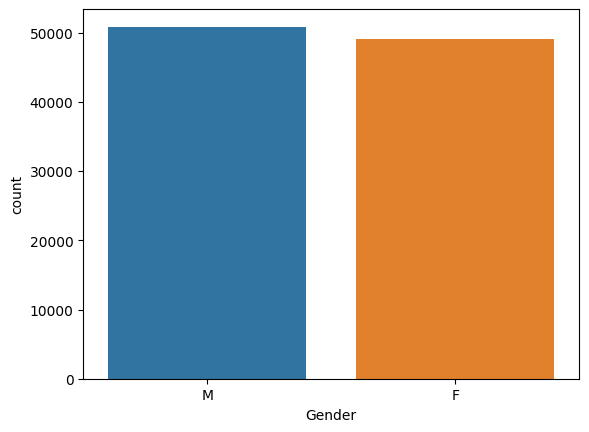

In [295]:
ax=sns.countplot(x=df['Gender'])

[Text(0, 0, 'Entertainment'),
 Text(1, 0, 'Services'),
 Text(2, 0, 'Restaurant'),
 Text(3, 0, 'Electronics'),
 Text(4, 0, 'Children'),
 Text(5, 0, 'Fashion'),
 Text(6, 0, 'Food'),
 Text(7, 0, 'Products'),
 Text(8, 0, 'Subscription'),
 Text(9, 0, 'Gaming')]

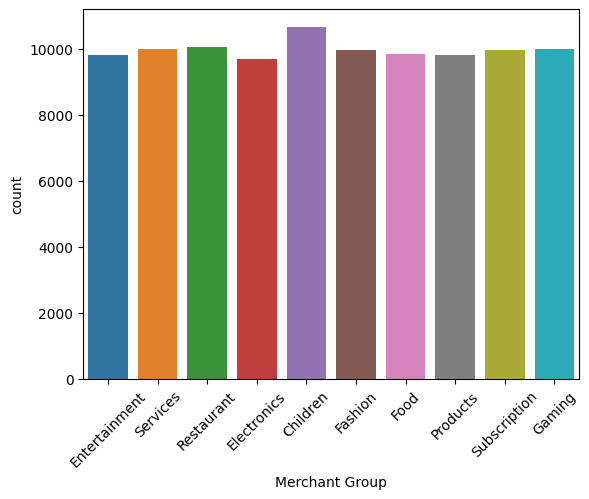

In [296]:
ax=sns.countplot(x=df['Merchant Group'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

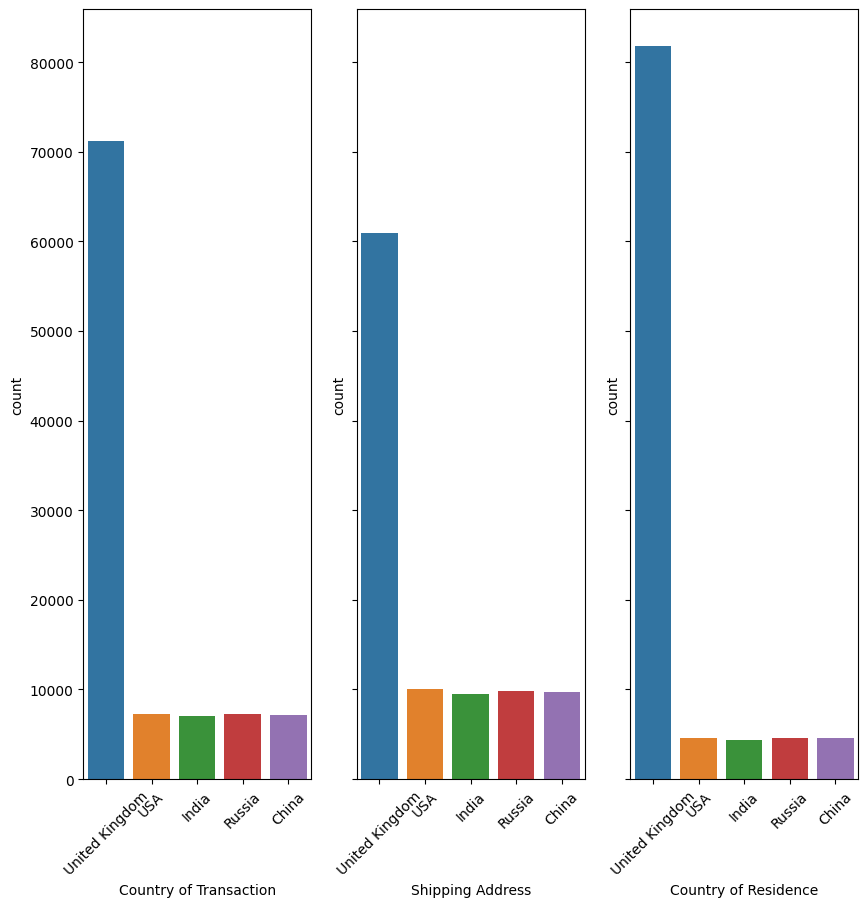

In [297]:
fig, axes = plt.pyplot.subplots(1,3, figsize=(10,10), sharey=True)
transaction=sns.countplot(x=df['Country of Transaction'], ax=axes[0])
transaction.set_xticklabels(transaction.get_xticklabels(), rotation=45)
shipping=sns.countplot(x=df['Shipping Address'], ax=axes[1])
shipping.set_xticklabels(shipping.get_xticklabels(), rotation=45)
residence=sns.countplot(x=df['Country of Residence'], ax=axes[2])
residence.set_xticklabels(residence.get_xticklabels(), rotation=45)
ax.tick_params(axis='x', labelrotation = 100)

<Axes: xlabel='Type of Transaction', ylabel='count'>

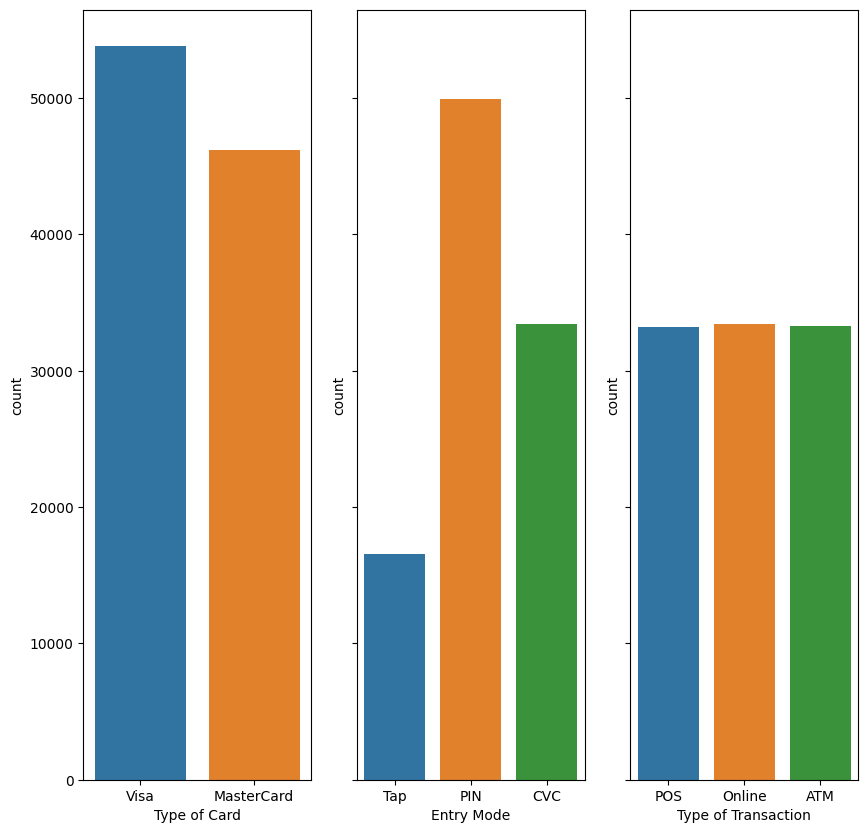

In [298]:
fig, axes = plt.pyplot.subplots(1,3, figsize=(10,10), sharey=True)
sns.countplot(x=df['Type of Card'], ax=axes[0])
sns.countplot(x=df['Entry Mode'], ax=axes[1])
sns.countplot(x=df['Type of Transaction'], ax=axes[2])


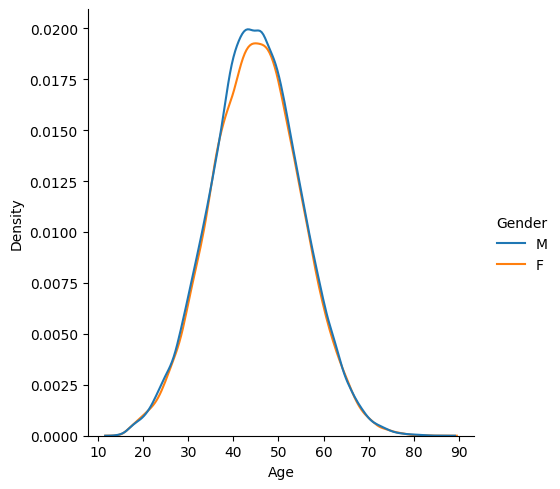

In [299]:

sns.displot(x=df['Age'], hue=df['Gender'], kind='kde')

Podemos notar que un banco del Reino Unido impera sobre los demás, similarmente,
las transacciones involucrando al UK son mayores; sin embargo, se ha decidido dejar dichas categorías sin cambios debido a que los paises que no son UK representan al menos un 20% del total de datos en su conjunto.

Por otro lado, note que la categoría de género está bien balanceada, así como las categorías de pago, de tipo de tarjeta, método de seguridad y tipo de transacción.

A pesar de ello, existe una clara disparidad entre los números de día, note que las columnas de Viernes y Jueves son prácticamente inexistentes.

In [300]:
df.groupby('Day of Week').count()

,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
Day of Week,,,,,,,,,,,,,,
Friday,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Thursday,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Tuesday,49785,49785,49785,49785,49785,49785,49785,49785,49785,49785,49785,49785,49785,49785
Wednesday,50166,50166,50166,50166,50166,50166,50166,50166,50166,50166,50166,50166,50166,50166


Debido a la poca cantidad de datos, y que meterían ruido a los posteriores modelos, se ha decidido eliminar los días Viernes y Jueves.
Más aún, note que la información de Day of Week es redundante porque sólo hay cuatro días en total contenidos en el dataset, por lo que hay una relación uno-a-uno (biyección) entre la columna Day of Week y Date.

Prescindiremos de la columna Date.


In [301]:
df=df.drop('Date', axis=1)

In [302]:
df=df.drop(df[df['Day of Week'] == 'Friday'].index)
df=df.drop(df[df['Day of Week'] == 'Thursday'].index)

In [303]:
df.reset_index(drop=True)

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99947,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99948,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99949,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


Podemos indagar sobre los tipos de datos por columna para verificar cualquier anomalía.

In [304]:
df.dtypes

Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object

Notamos que Amount es un objeto cuando es deseable que sea un número. Esto se debe a la presencia del símbolo de libra (£).

Más aún, la columna Fraud contiene números, cuando es deseable que sean boleanos en miras de la clasificación binaria a realizar.

In [305]:
df['Amount']=df['Amount'].apply(lambda x:x.replace('£',''))

In [306]:
df=df.astype({'Day of Week': 'category', 'Type of Card': 'category','Entry Mode': 'category', 'Amount':'float64',
           'Type of Transaction': 'category', 'Merchant Group' : 'category', 'Country of Transaction' : 'category',
           'Shipping Address':'category', 'Country of Residence': 'category', 'Gender': 'category',
           'Bank':  'category'})
df=df.astype({'Fraud':'bool'})
df=df.reset_index(drop=True)

In [307]:
df

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,False
1,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,False
2,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,False
3,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,False
4,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,False
99947,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,False
99948,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,False
99949,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,False


In [308]:
df.to_csv('Data_Clean.csv')